In [1]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
scipy: 1.0.0
numpy: 1.14.0
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify
import numpy as np
import seaborn as sns

from wordcloud import WordCloud,STOPWORDS

import missingno as msno

%matplotlib inline

# Data Collection

In [3]:
data = pd.read_csv("WineReview.csv", index_col=0)
print(data.describe().transpose())
print(data.info())

           count       mean        std   min   25%   50%   75%     max
points  129971.0  88.447138   3.039730  80.0  86.0  88.0  91.0   100.0
price   120975.0  35.363389  41.022218   4.0  17.0  25.0  42.0  3300.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
country                  129908 non-null object
description              129971 non-null object
designation              92506 non-null object
points                   129971 non-null int64
price                    120975 non-null float64
province                 129908 non-null object
region_1                 108724 non-null object
region_2                 50511 non-null object
taster_name              103727 non-null object
taster_twitter_handle    98758 non-null object
title                    129971 non-null object
variety                  129970 non-null object
winery                   129971 non-null object
dtypes: float64(1), int64(1), object(11)
memory usage: 

#### This dataset includes two numerical columns and eleven categorical columns. 

# Data Wrangling

In [4]:
data=data.drop_duplicates(keep=False)
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### After dropping duplicates, we found 110,005 unique rows. There is almost 20,000 duplicates records(129971-110005=19966).

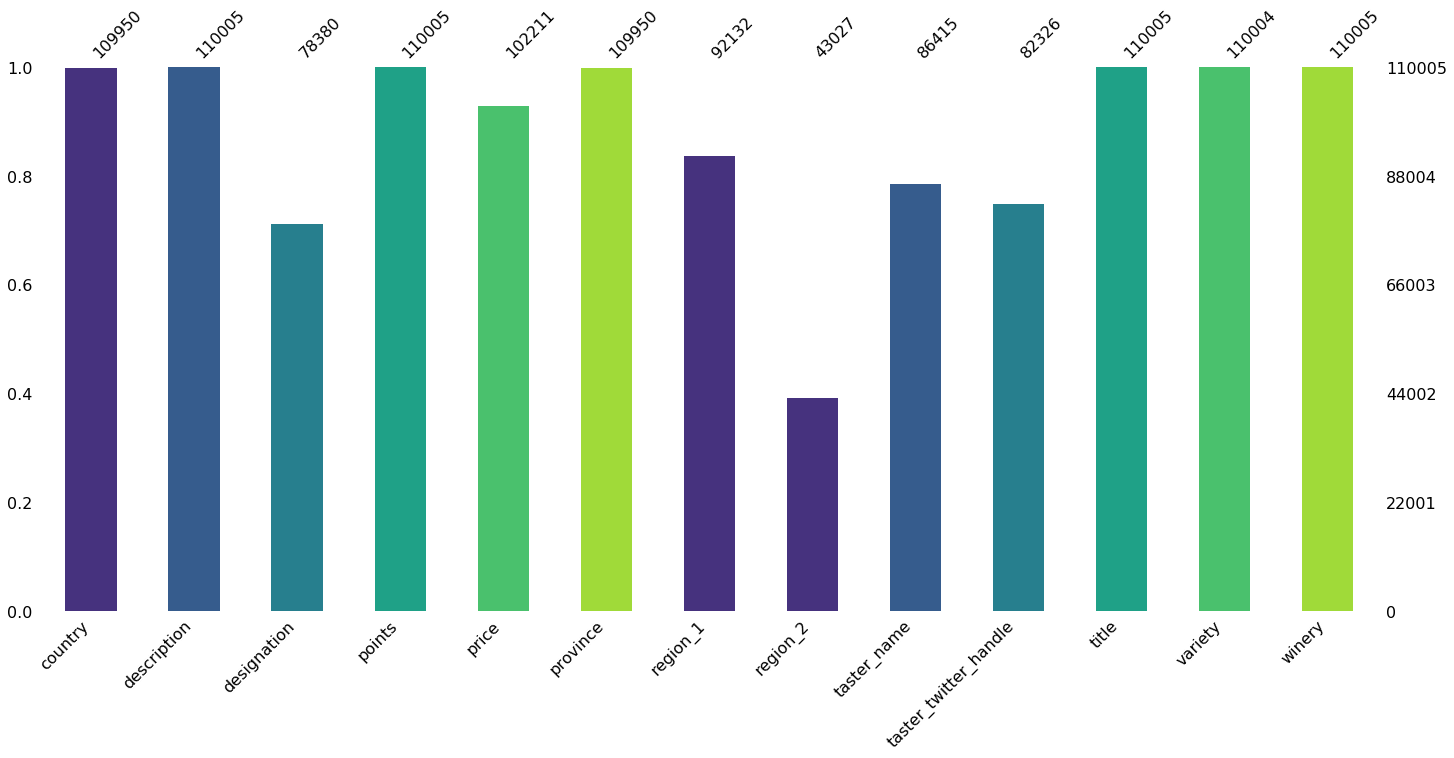

In [5]:
msno.bar(data,color= sns.color_palette('viridis'))

In [6]:
MissingValue = data.isnull().sum().sort_values(ascending = False)
Percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
MissingData = pd.concat([MissingValue, Percent], axis=1, keys=['MissingValue', 'Percent'])
MissingData

,MissingValue,Percent
region_2,66978,60.886323
designation,31625,28.748693
taster_twitter_handle,27679,25.161584
taster_name,23590,21.444480
region_1,17873,16.247443
price,7794,7.085132
province,55,0.049998
country,55,0.049998
variety,1,0.000909
winery,0,0.000000


#### Based on above table and graph, we found 9 columns missing values. As for columns "province", "country", and "variety", their missing values percentages are less than 1%, so we can just drop these records. As for other 6 columns, we can use corresponding methods to process numerical column and categorical columns.

In [7]:
data = data[data["country"].notnull() & data["province"].notnull() & data["variety"].notnull()]

In [8]:
data.shape

(109949, 13)

#### After dropping 56 (55+1) records, our data shape became 109949. 

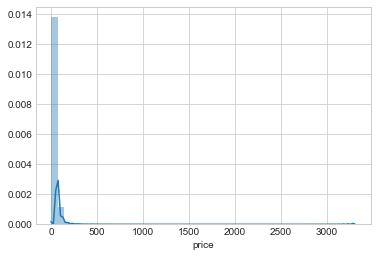

In [9]:
sns.set_style('whitegrid')
sns.distplot(data[data['price'].notnull()]['price'])

In [10]:
data['price'].describe()

count    102159.000000
mean         35.931029
std          43.356720
min           4.000000
25%          17.000000
50%          25.000000
75%          43.000000
max        3300.000000
Name: price, dtype: float64

In [11]:
data['price'].mode()

0    20.0
dtype: float64

There are : 2.8122129350880862 % wines more expensive then 100 USD


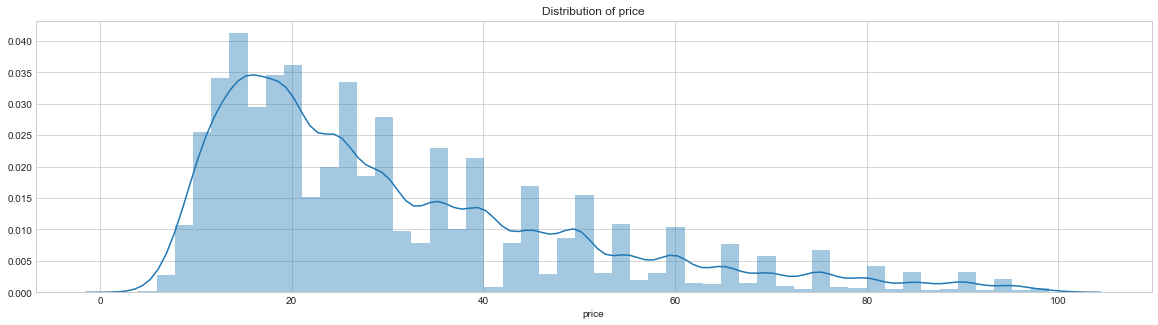

In [12]:
plt.figure(figsize=(20,5))
plt.title("Distribution of price")
ax = sns.distplot(data[data["price"]<100]['price'])

percent=data[data['price']>100].shape[0]/data.shape[0]*100
print("There are :", percent, "% wines more expensive then 100 USD")

#### If we want to see better price distribution we have to scale our price or drop the tail. By dropping almost three percent of wines, we got the normal distribution whose prices are less than 100 usd.

In [13]:
median_price=data['price'].median()
data['price']=data['price'].fillna(median_price)

#### By visualize "price" in distribution plot and compare mean, median and mode value (mean is 35 and median is 25, which suggests a heavily skewed dataset with some outlier observations influencing the mean of the distribution), we fill the unavailable values with the median of the distribution.

In [14]:
data['price'].describe()

count    109949.000000
mean         35.156554
std          41.886560
min           4.000000
25%          18.000000
50%          25.000000
75%          40.000000
max        3300.000000
Name: price, dtype: float64

#### As can be seen above, the interpolation has not significantly altered the summary statistics of the distribution.

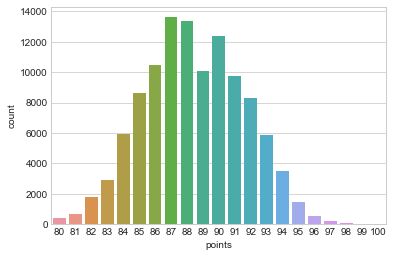

In [15]:
sns.set_style('whitegrid')
sns.countplot(data['points'])

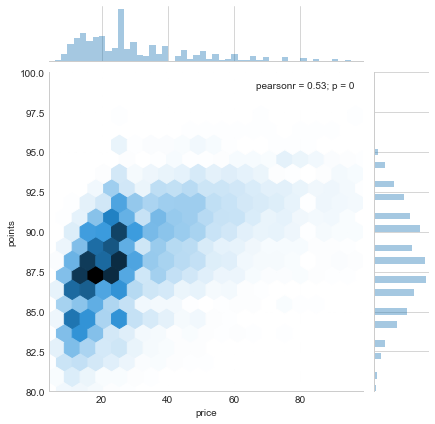

In [16]:
sns.jointplot(x='price', y='points', data=data[data['price'] < 100], kind='hex', 
              gridsize=20)

#### The hexplot shows that the bottles of wine reviewed by Wine Magazine cluster around 87.5 points and around 20 USD.

In [17]:
data['taster_index'] = pandas.factorize(data['taster_name'])[0]
data['twitter_index'] = pandas.factorize(data['taster_twitter_handle'])[0]

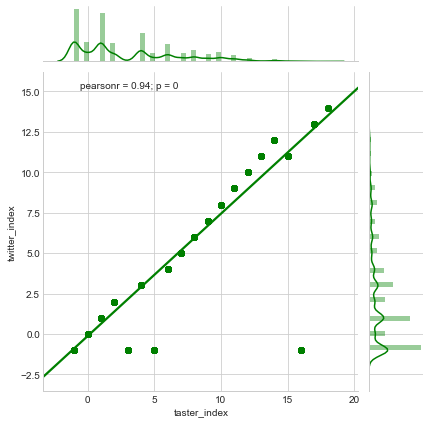

In [18]:
sns.jointplot(x='taster_index',y='twitter_index',data=data,kind='reg',color='green')

#### From the above plot we can find these two features are highly related. What's more, under common sense we know feature 'taster_twitter_handle' is feature 'taster_name' twitter accounts, so I'm going to drop one feature of these two. As column 'taster_twitter_handle' has more missing value, I'm going to drop it.

In [19]:
data = data.drop(['taster_twitter_handle', 'taster_index', 'twitter_index'], axis=1)

In [20]:
data

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
15,Germany,Zesty orange peels and apple notes abound in t...,Devon,87,24.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Richard Böcking 2013 Devon Riesling (Mosel),Riesling,Richard Böcking


In [78]:
data['designation'] = data['designation'].replace(np.nan,'unknown')
data['region_1'] = data['region_1'].replace(np.nan,'unknown')
data['region_2'] = data['region_2'].replace(np.nan,'unknown')
data['taster_name'] = data['taster_name'].replace(np.nan,'unknown')
data.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,unknown,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,unknown,unknown,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",unknown,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,unknown,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


#### designation: The vineyard within the winery where the grapes that made the wine are from. 
#### region_1: The wine growing area in a province or state (ie Napa). 
#### region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank. 
#### taster_name: Name of the person who tasted and reviewed the wine.
#### I use 'unknown' to replace missing value in these four columns which stand for another category among variables. This is the simplest  way to impute categorical variables.

## So far, we have impute all missing value and it is time to analyze every feature.

# Feature Engineer

In [22]:
cnt = data.groupby(['country'])['price'].mean().sort_values(ascending=False).to_frame() # group by data 'country' based on average wine price.
cnt.head(6)

,price
country,
Switzerland,55.400000
England,52.403846
Germany,44.487631
Hungary,44.133929
France,39.325633
Italy,38.153794


#### The top country,  Switzerland, which have the highest average wine price 55.4 usd. Both France and Italy have the so-called wine countries, but their average prices are lised as fifth and sixth. 

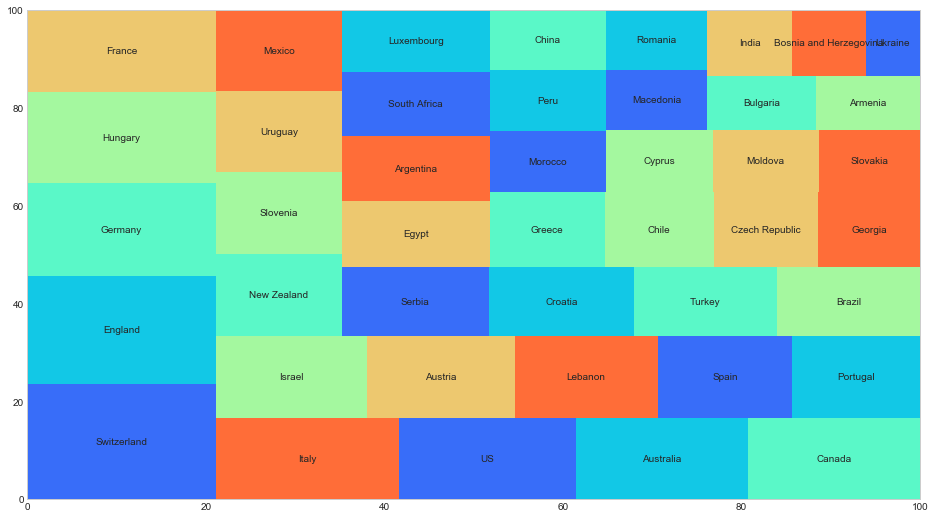

In [23]:
plt.figure(figsize=(16,9))
squarify.plot(cnt['price'],color=sns.color_palette('rainbow'),label=cnt.index)

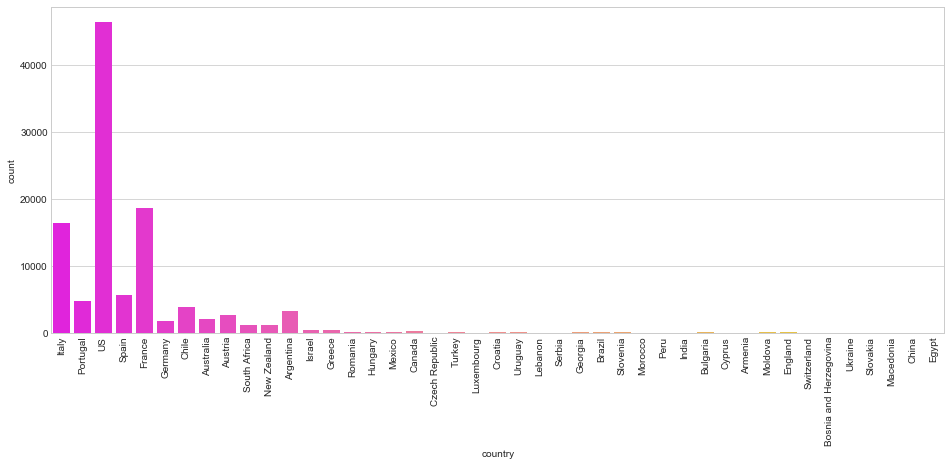

In [24]:
plt.figure(figsize = (16,6))
sns.countplot(x = data['country'], palette='spring')
plt.xticks(rotation = 90);

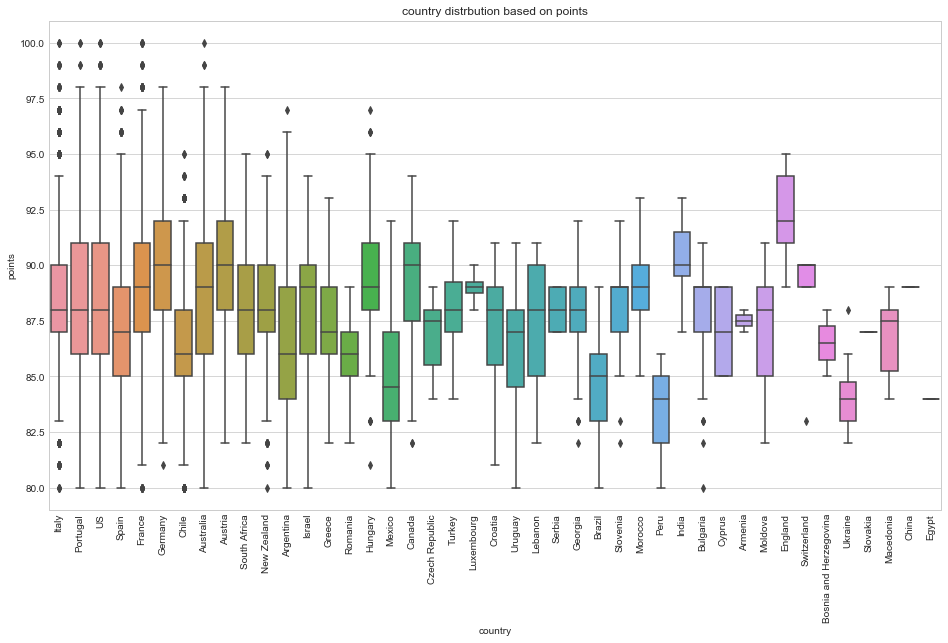

In [25]:
plt.figure(figsize=(16,9)) # plot size
plt.xticks(rotation=90) # rotate country name in x-axis.
plt.title('country distrbution based on points')
sns.boxplot(x='country',y='points',data=data)

In [26]:
MaxRatedCNT = data.groupby(['country'])['points'].max().sort_values(ascending=False).to_frame()[:15]
MinRatedCNT = data.groupby(['country'])['points'].min().sort_values(ascending=True).to_frame()[:15]
AvgRatedCNT = data.groupby(['country'])['points'].mean().sort_values(ascending=False).to_frame()

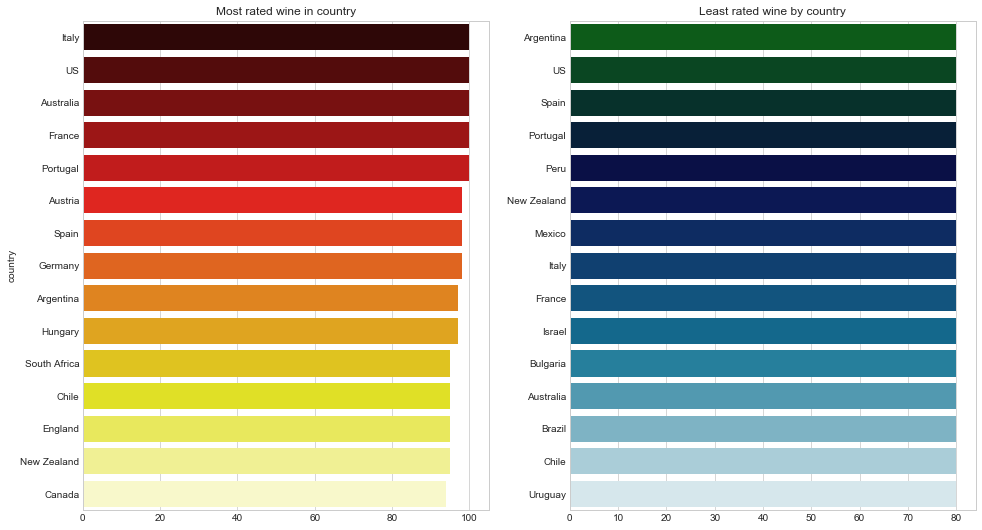

In [27]:
fig,ax = plt.subplots(1,2,figsize=(16,9))
ax1,ax2 = ax.flatten()
sns.barplot(x = MaxRatedCNT['points'], y = MaxRatedCNT.index, palette= 'hot',ax=ax1)
ax1.set_xlabel('')
ax1.set_title('Most rated wine in country')
sns.barplot(x = MinRatedCNT['points'], y = MinRatedCNT.index, palette = 'ocean',ax=ax2)
ax2.set_ylabel('')
ax2.set_xlabel('')
ax2.set_title('Least rated wine by country')
plt.subplots_adjust(wspace=0.2);

#### The rating of wine is varies from 0 to 100, but least rating is 80.
#### The wine produced in Italy, US, Australia, France and Portugal receives top rating.
#### The wine produced in Argentina, US, Spain, Portugal and Peru reveices least rating.
#### Both US and Spain received most rated wines and least rated wines.

Text(0.5,1,'Average rated wine by country')

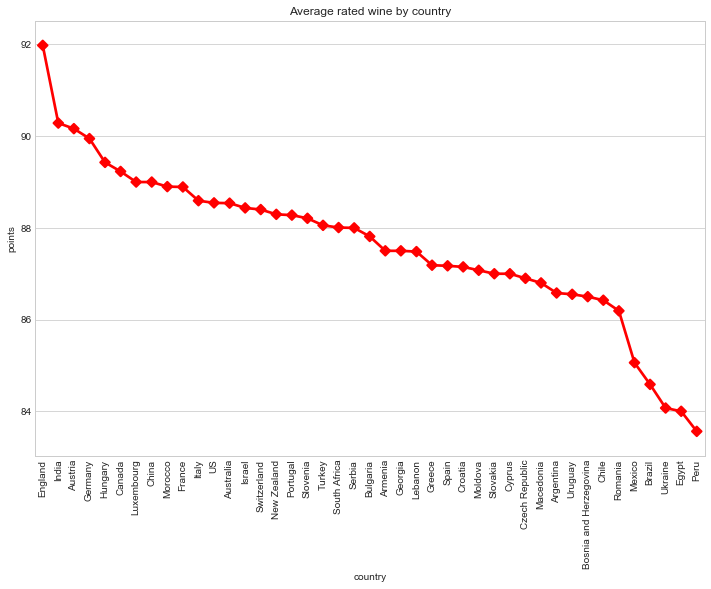

In [28]:
plt.figure(figsize=(12,8))
sns.pointplot(x=AvgRatedCNT.index,y=AvgRatedCNT['points'],color='red',markers='D')
plt.xticks(rotation=90)
plt.title('Average rated wine by country')

#### The average rating of wine for England is top in the table, which is 92.
#### Coutries like India, Austria and Germany are top quality wine producing countries, which are over 90.
#### Countries like Ukraine, Egypt and Peru produced least quality wine.

In [29]:
Subdata1 = data[data['points'] > 88]
Subdata1.shape

(52169, 12)

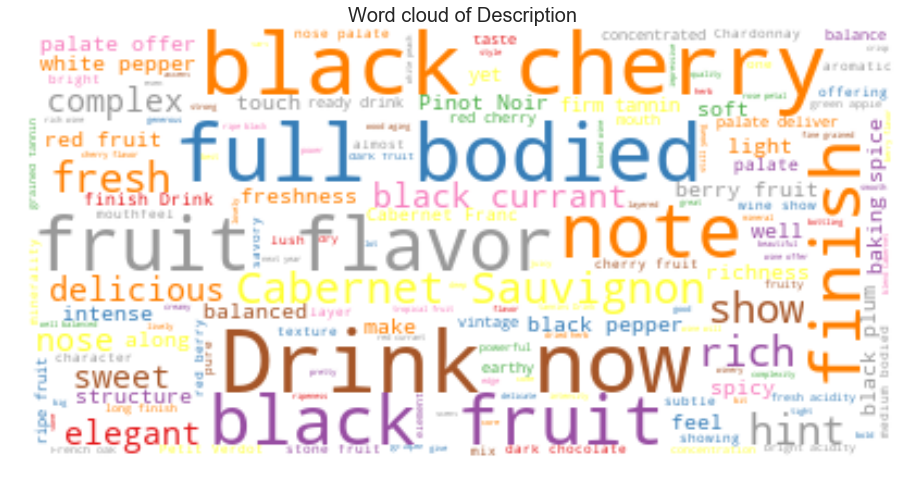

In [30]:
plt.figure(figsize= (16,8))
plt.title('Word cloud of Description',fontsize=20)
wc = WordCloud(max_words=1000,max_font_size=40,background_color='white', stopwords = STOPWORDS,colormap='Set1')
wc.generate(' '.join(Subdata1['description']))
plt.imshow(wc,interpolation="bilinear")
plt.axis('off');

#### Dataset "Subdata1" is the subset of 'data' whose points are over average points 88. By visulizing the description, we can find the top 10 words which entered into our eyes are: "black", "cherry", "falvor", "drink", "now", "black", "note", "finish", "bodied" and "full" .

In [31]:
dsng=data[data['designation']!='unknown']
dsng.shape

(78334, 12)

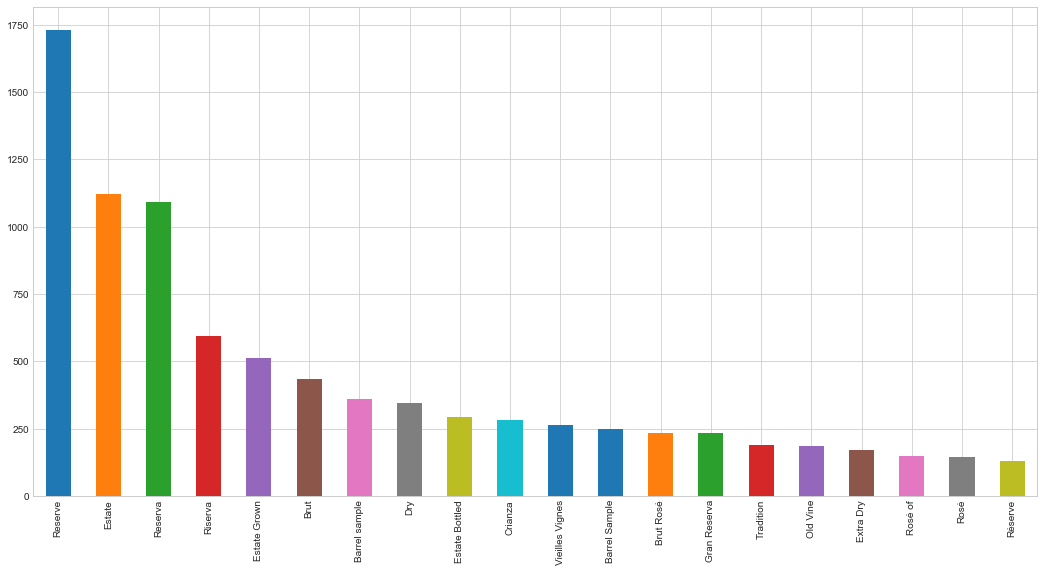

In [32]:
plt.figure(figsize=(18,9))
designa=dsng['designation'].value_counts()
designa.head(20).plot.bar()

#### Above table shows top 20 most frequent designation (where grapes are planted). The first one is Reserve and count almost 1750.

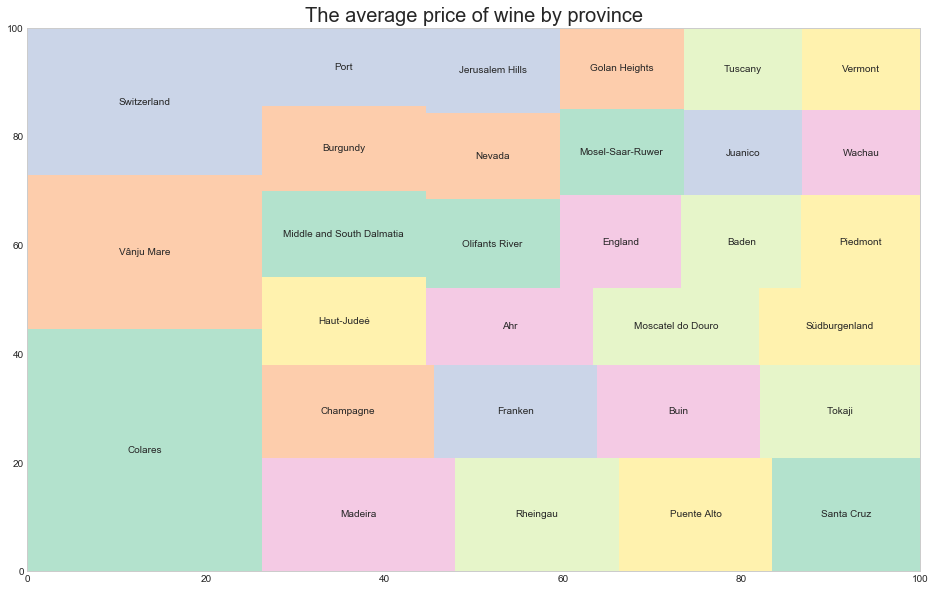

In [33]:
Provc = data.groupby(['province'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,10))
squarify.plot(Provc['price'],label=Provc.index,color= sns.color_palette('Pastel2'))
plt.title('The average price of wine by province',fontsize=20);

In [34]:
ProCoty = data.groupby(['province','country'])['price'].agg(['mean']).sort_values(by='mean',ascending= False)[:5]
ProCoty.reset_index(inplace=True)
ProCoty.style.background_gradient(cmap='Blues',high=0.5)

,province,country,mean
0,Colares,Portugal,262.5
1,Vânju Mare,Romania,166
2,Switzerland,Switzerland,160
3,Madeira,Portugal,101.308
4,Rheingau,Germany,85.8524


#### Based on average wine price, the top three provinces are Colares, Vanju Mare and Switzerland. They arefrom Portugal, Romania and Switzerland.

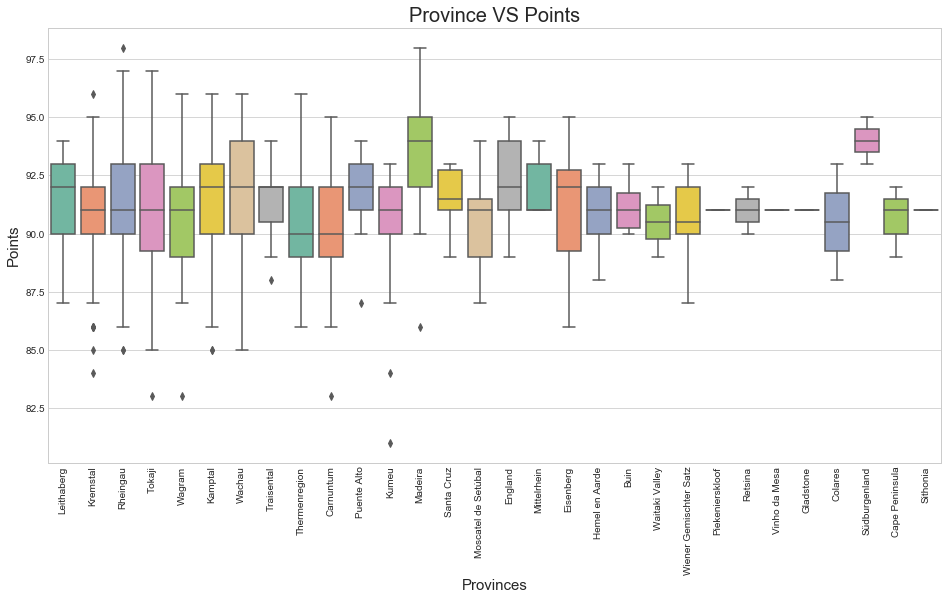

In [35]:
plt.figure(figsize= (16,8))
ProvcPts = data.groupby(['province'])['points'].mean().sort_values(ascending=False).to_frame()[:30]
prov = sns.boxplot(y='points', x='province',
                  data=data[(data.province.isin(ProvcPts.index.values))],
                 palette='Set2')
prov.set_title("Province VS Points", fontsize=20)
prov.set_xlabel("Provinces", fontsize=15)
prov.set_ylabel("Points", fontsize=15)
plt.xticks(rotation = 90);

In [36]:
ProCotyP = data.groupby(['province','country'])['points'].agg(['mean']).sort_values(by='mean',ascending= False)[:5]
ProCotyP.reset_index(inplace=True)
ProCotyP.style.background_gradient(cmap='RdPu',high=0.5)

,province,country,mean
0,Südburgenland,Austria,94
1,Madeira,Portugal,93.2308
2,Mittelrhein,Germany,92
3,England,England,91.9808
4,Wachau,Austria,91.8885


#### Based on average points, the top three provinces are Sudburgenland, Madeira and Mitterlrhein. They are from Austria, Portugal and Germany.

Text(0,0.5,'Counts')

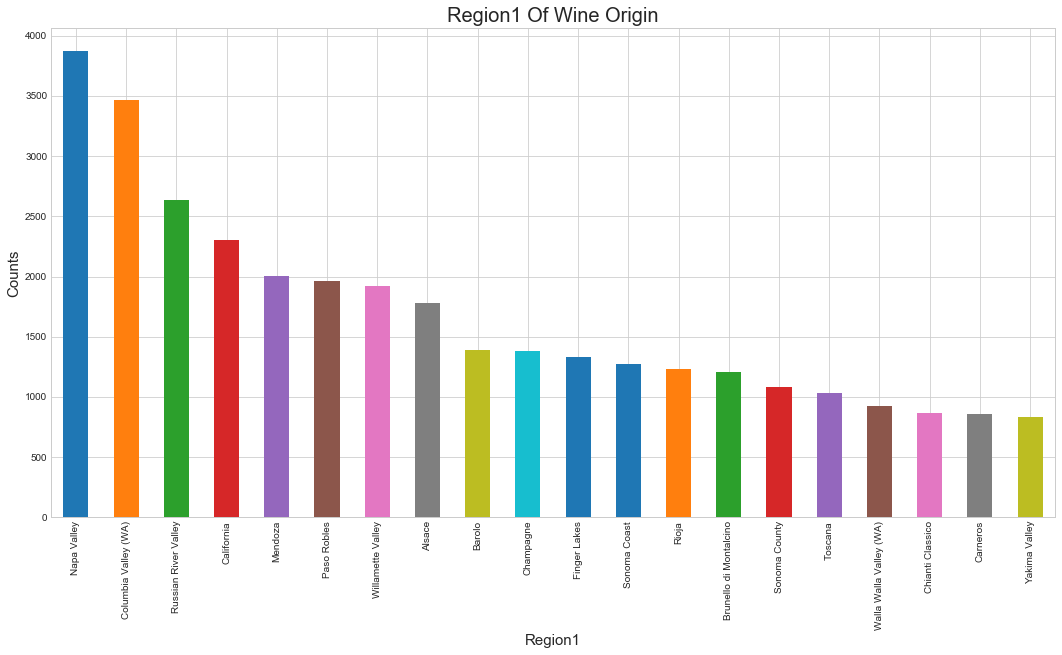

In [37]:
plt.figure(figsize=(18,9))
Region_1=data[data['region_1']!='unknown']
Region_1Cnt=Region_1['region_1'].value_counts()
g = Region_1Cnt.head(20).plot.bar()
g.set_title("Region1 Of Wine Origin", fontsize=20)
g.set_xlabel("Region1", fontsize=15)
g.set_ylabel("Counts", fontsize=15)

In [38]:
RegCotyPrice = data.groupby(['region_1','country'])['price'].agg(['mean']).sort_values(by='mean',ascending= False)[:5]
RegCotyPrice.reset_index(inplace=True)
RegCotyPrice.style.background_gradient(cmap='inferno_r',high=0.5)

,region_1,country,mean
0,La Romanée,France,1412.5
1,Musigny,France,741.5
2,Montrachet,France,542.25
3,Mazoyeres-Chambertin,France,475
4,Bienvenues Bâtard-Montrachet,France,443


#### Based on average price, the top five region_1 are all from France. The top one is 1412.5 USD.

In [39]:
RegCotyPoints = data.groupby(['region_1','country'])['points'].agg(['mean']).sort_values(by='mean',ascending= False)[:5]
RegCotyPoints.reset_index(inplace=True)
RegCotyPoints.style.background_gradient(cmap='Vega20c',high=0.5)

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The Vega20c colormap was deprecated in version 2.0. Use tab20c instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


,region_1,country,mean
0,Bolgheri Sassicaia,Italy,96.625
1,Corton-Pougets,France,96.5
2,Bienvenues Bâtard-Montrachet,France,96.5
3,Napa-Monterey-Mendocino,US,96
4,Montrachet,France,96


#### Based on average points, the top region_1 is from Italy, followed by three regions from France and one region from US. 

Text(0,0.5,'Counts')

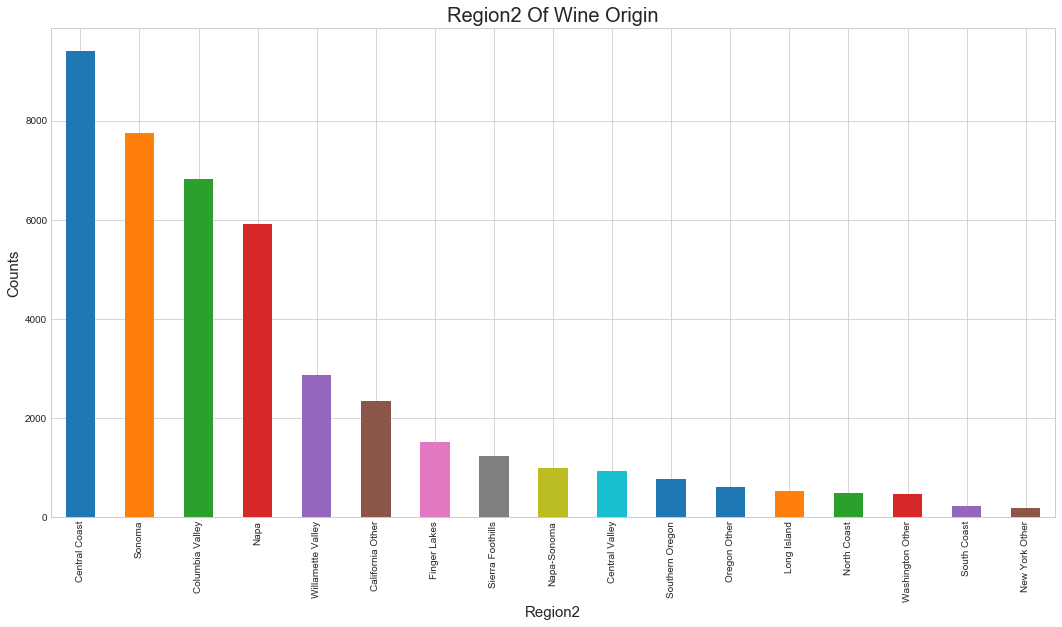

In [40]:
plt.figure(figsize=(18,9))
Region_2=data[data['region_2']!='unknown']
Region_2Cnt=Region_2['region_2'].value_counts()
r = Region_2Cnt.plot.bar()
r.set_title("Region2 Of Wine Origin", fontsize=20)
r.set_xlabel("Region2", fontsize=15)
r.set_ylabel("Counts", fontsize=15)

In [41]:
print('Number of reqion2: ',data['region_2'].nunique())
re2 = data.groupby(['region_2','country'])['region_2'].agg(['count']).sort_values(by='count',ascending= False)
re2.reset_index(inplace=True)
Re_2=re2[re2['region_2']!='unknown']
Re_2.style.background_gradient(cmap='jet_r',high=0.3)
Re_2.style.set_table_styles([{'selector': 'tr:hover','props': [('background-color', 'pink')]}])

Number of reqion2:  18


,region_2,country,count
2,Central Coast,US,9401
3,Sonoma,US,7752
4,Columbia Valley,US,6829
5,Napa,US,5924
11,Willamette Valley,US,2861
13,California Other,US,2335
16,Finger Lakes,US,1507
17,Sierra Foothills,US,1228
20,Napa-Sonoma,US,999
21,Central Valley,US,922


#### Combined above two tables, There are 17 unique region_2 (plus one 'unknown' ) and all of them are from US. The top one is Central Coast, which counted as 9401. 

Text(0.5,0,'Counts')

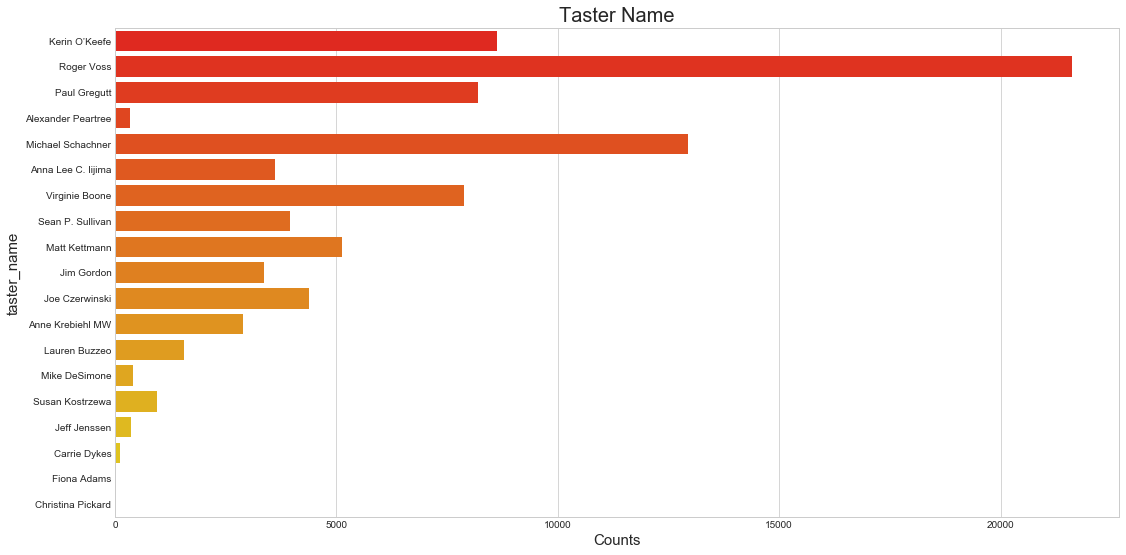

In [42]:
plt.figure(figsize=(18,9))
TasterName=data[data['taster_name']!='unknown']
Taster_NameCnt=TasterName['taster_name']
sns.countplot(y = Taster_NameCnt, palette = 'autumn')
plt.title("Taster Name", fontsize=20)
plt.ylabel("taster_name", fontsize=15)
plt.xlabel("Counts", fontsize=15)

#### Tasters Roger Voss, Michael Schachner and Kerin O'Keefe rated most wines. 

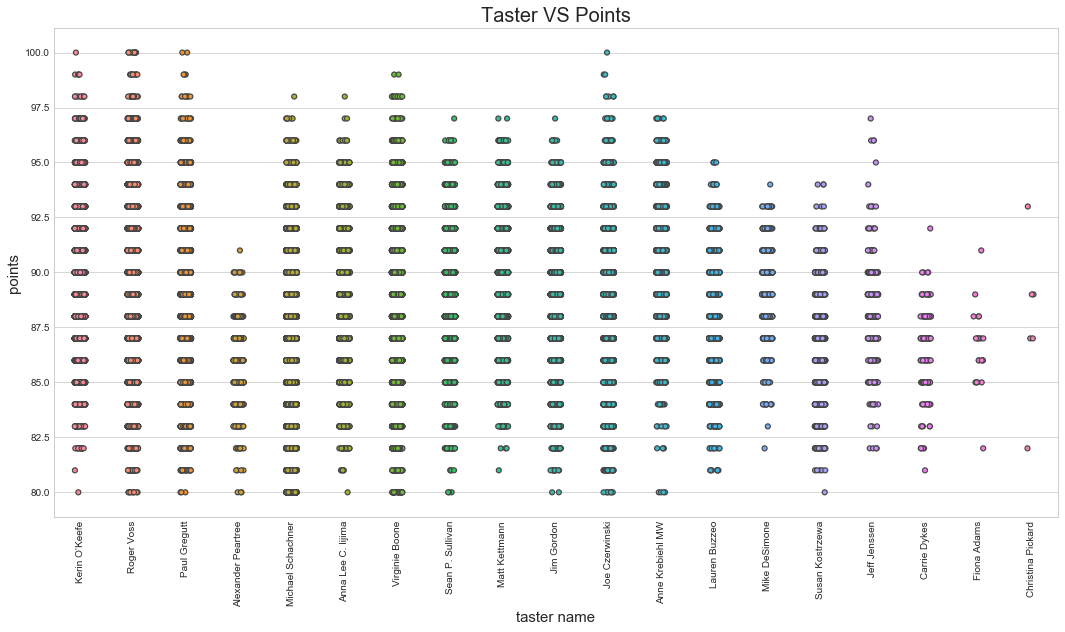

In [43]:
plt.figure(figsize=(18,9))
sns.stripplot(x=Taster_NameCnt,y=data['points'],jitter=1,linewidth=1.2)
plt.title("Taster VS Points", fontsize=20)
plt.xlabel("taster name", fontsize=15)
plt.ylabel("points", fontsize=15)
plt.xticks(rotation = 90);

#### There are four persons rated both highest points and lowest points, they are Kerin O'Keefe, Roger Voss, Paul Gregutt and Joe Czerwinski. 

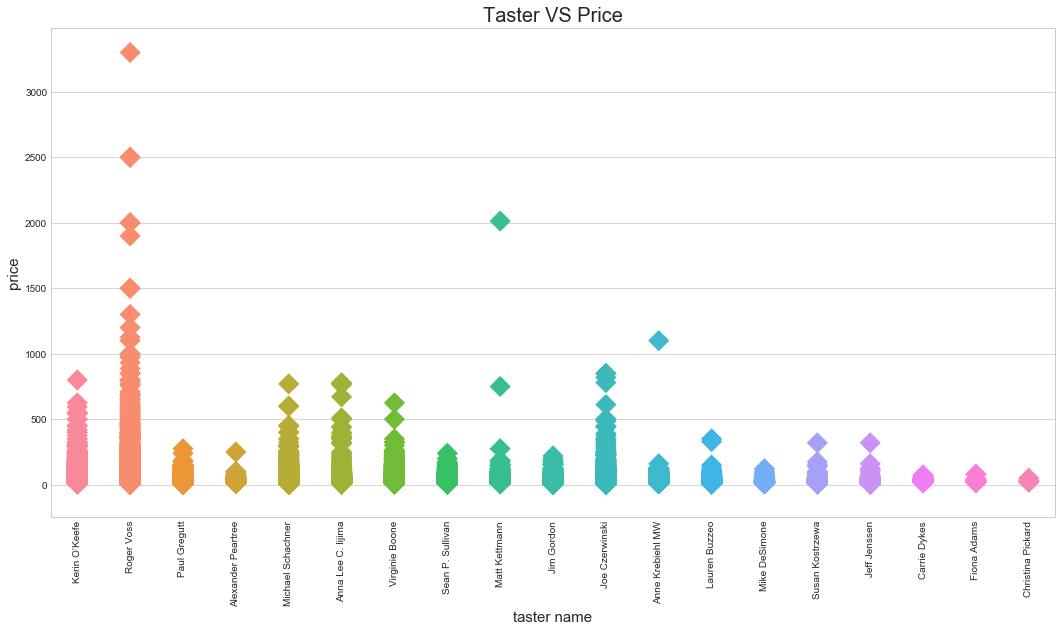

In [44]:
plt.figure(figsize=(18,9))
sns.stripplot(x=Taster_NameCnt,y=data['price'],marker='D',dodge=True,size=15)
plt.title("Taster VS Price", fontsize=20)
plt.xlabel("taster name", fontsize=15)
plt.ylabel("price", fontsize=15)
plt.xticks(rotation = 90);

#### As we can see, both Roger Voss and Matt Kettmann rated wines whose prices are over 2,000 USD. 
#### Roger Voss entered my eyes based on the above three tables so I plan to have a deep look on him.

In [45]:
RV =data[data['taster_name']=='Roger Voss']
RVdf=RV.drop(['taster_name','title','description'], axis=1)
RVdf.head()

,country,designation,points,price,province,region_1,region_2,variety,winery
1,Portugal,Avidagos,87,15.0,Douro,unknown,unknown,Portuguese Red,Quinta dos Avidagos
7,France,unknown,87,24.0,Alsace,Alsace,unknown,Gewürztraminer,Trimbach
30,France,Nouveau,86,25.0,Beaujolais,Beaujolais-Villages,unknown,Gamay,Domaine de la Madone
63,France,Brut Rosé,86,58.0,Champagne,Champagne,unknown,Champagne Blend,Roland Champion
65,France,unknown,86,24.0,Burgundy,Chablis,unknown,Chardonnay,Simonnet-Febvre


In [46]:
RVdf['country'].nunique()

7

In [47]:
c=RVdf.groupby(['country'])['country'].agg(['count']).sort_values(by='count',ascending= False)
c.reset_index(inplace=True)
c

,country,count
0,France,15698
1,Portugal,4788
2,Austria,998
3,Italy,95
4,South Africa,22
5,US,2
6,Greece,1


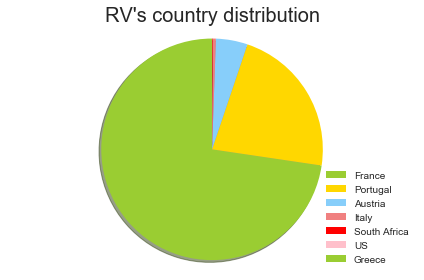

In [48]:
labels = ['France','Portugal','Austria', 'Italy', 'South Africa', 'US','Greece']
sizes = [15698, 4788, 998, 95, 22, 2,1]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','red','pink']
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
plt.legend(patches, labels, loc="best")
plt.title("RV's country distribution", fontsize=20)
plt.axis('equal')
plt.tight_layout()
plt.show()

#### Roger Voss is mainly focused on France wine, follosed by Portugal.

In [49]:
RV_France=RVdf[RVdf['country']=='France']
RV_France=RV_France.drop(['country'], axis=1)

In [50]:
RV_France['province'].describe()

count        15698
unique          11
top       Bordeaux
freq          5146
Name: province, dtype: object

In [51]:
p=RV_France.groupby(['province'])['province'].agg(['count']).sort_values(by='count',ascending= False)
p.reset_index(inplace=True)
p

,province,count
0,Bordeaux,5146
1,Burgundy,3357
2,Loire Valley,1505
3,Champagne,1308
4,Southwest France,1261
5,Provence,966
6,Beaujolais,843
7,Alsace,786
8,France Other,483
9,Rhône Valley,23


#### There are 11 provinces in France that are rated by Roger Voss and the top one is Bordeaux and counted as 5146. 

In [52]:
RV_France_B=RV_France[RV_France['province']=='Bordeaux']
RV_France_B=RV_France_B.drop(['province'], axis=1)
RV_France_B.head()

,designation,points,price,region_1,region_2,variety,winery
290,unknown,92,25.0,Saint-Estèphe,unknown,Bordeaux-style Red Blend,Château Lafon-Rochet
316,Les Amants Mont-Pérat,86,25.0,Bordeaux Blanc,unknown,Bordeaux-style White Blend,Château Mont-Pérat
317,unknown,86,25.0,Bordeaux Blanc,unknown,Bordeaux-style White Blend,Château Tour de Mirambeau
419,unknown,89,20.0,Graves,unknown,Bordeaux-style Red Blend,Château de Callac
420,unknown,89,25.0,Bordeaux Blanc,unknown,Bordeaux-style White Blend,Château de Marsan


In [53]:
RV_France_B['region_1'].describe()

count              5146
unique               45
top       Saint-Émilion
freq                501
Name: region_1, dtype: object

In [54]:
Rr1=RV_France_B.groupby(['region_1'])['region_1'].agg(['count']).sort_values(by='count',ascending= False)
Rr1.reset_index(inplace=True)
Rr1.head()

,region_1,count
0,Saint-Émilion,501
1,Bordeaux,447
2,Bordeaux Blanc,393
3,Bordeaux Supérieur,386
4,Pessac-Léognan,352


#### There are 45 region_1 in Bordeaux that are rated by Roger Voss and the top one is Saint-Emilion and counted as 501. 
#### I'm going to analyze region_1 data and drop region_2 as we already know only US has the region_2 information. 

In [55]:
RV_France_B_R1=RV_France_B[RV_France_B['region_1']=='Saint-Émilion']
RV_France_B_R1=RV_France_B_R1.drop(['region_1','region_2'], axis=1)
RV_France_B_R1.head()

,designation,points,price,variety,winery
576,Les Terrasses de Pressac,89,37.0,Bordeaux-style Red Blend,Château de Pressac
795,Divin de Corbin,90,35.0,Bordeaux-style Red Blend,Château Corbin
1220,unknown,93,40.0,Bordeaux-style Red Blend,Château Tour Grand Faurie
1356,Château Grand Martinet,86,75.0,Bordeaux-style Red Blend,Horeau-Beylot
1364,unknown,86,25.0,Bordeaux-style Red Blend,Château de Ferrand


In [56]:
RV_France_B_R1['designation'].describe()

count         501
unique         67
top       unknown
freq          301
Name: designation, dtype: object

In [57]:
RV_France_B_R1['winery'].describe()

count                501
unique               177
top       Château Ausone
freq                  12
Name: winery, dtype: object

In [58]:
D=RV_France_B_R1.groupby(['designation'])['designation'].agg(['count']).sort_values(by='count',ascending= False)
D.reset_index(inplace=True)
D.head()

,designation,count
0,unknown,301
1,Barrel sample,63
2,Barrel Sample,52
3,La Chapelle d'Ausone,4
4,Le Petit Cheval,4


In [59]:
w=RV_France_B_R1.groupby(['winery'])['winery'].agg(['count']).sort_values(by='count',ascending= False)
w.reset_index(inplace=True)
w.head()

,winery,count
0,Château Ausone,12
1,Château Cheval Blanc,11
2,Château la Gaffelière,11
3,Château Valandraud,10
4,Château Troplong Mondot,10


#### I'm going to focus on designation first as unique number in designation is less than winery.
#### The top designation in designation is unknown, so I'm going to do the second choice. As I found the second one and the third one hold the same name, so I choose to combine them. 

In [60]:
RV_France_B_R1_BS1=RV_France_B_R1[RV_France_B_R1['designation']=='Barrel sample']
RV_France_B_R1_BS1=RV_France_B_R1_BS1.drop(['designation'], axis=1)

RV_France_B_R1_BS2=RV_France_B_R1[RV_France_B_R1['designation']=='Barrel Sample']
RV_France_B_R1_BS2=RV_France_B_R1_BS2.drop(['designation'], axis=1)

RV_France_B_R1_BS = pd.concat([RV_France_B_R1_BS1, RV_France_B_R1_BS2])
RV_France_B_R1_BS = RV_France_B_R1_BS.drop(['variety'], axis=1)
RV_France_B_R1_BS.head()

,points,price,winery
4647,89,25.0,Château Dassault
12621,88,25.0,Château Franc Mayne
14595,94,25.0,Vieux Château Mazerat
21167,93,25.0,Château la Dominique
21170,93,25.0,Château Beausejour-Duffau-Lagarrosse


#### I also found the variety is the same, so I drop it and leave the above table. 

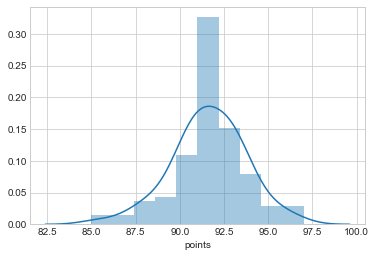

In [61]:
sns.distplot(RV_France_B_R1_BS['points'])

In [62]:
RV_France_B_R1_BS['points'].describe()

count    115.000000
mean      91.626087
std        2.117019
min       85.000000
25%       90.000000
50%       92.000000
75%       93.000000
max       97.000000
Name: points, dtype: float64

#### The average points and mode can be rounded as 92, which is higher than the average point of total dataset 88. 

In [63]:
RVdf['price'].describe()

count    21604.000000
mean        37.031059
std         68.477428
min          5.000000
25%         17.000000
50%         25.000000
75%         34.000000
max       3300.000000
Name: price, dtype: float64

In [64]:
RVdf['points'].describe()

count    21604.000000
mean        88.763331
std          3.138363
min         80.000000
25%         86.000000
50%         89.000000
75%         91.000000
max        100.000000
Name: points, dtype: float64

There are : 4.318644695426773 % wines more expensive than 100 USD.


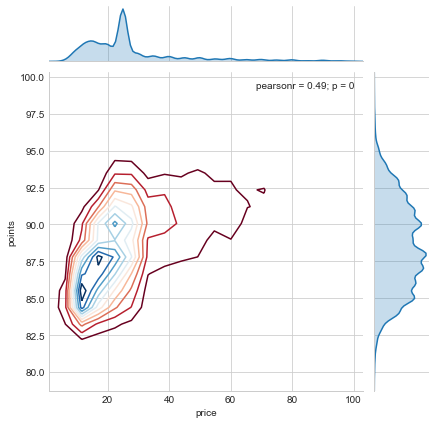

In [65]:
percent=RVdf[RVdf['price']>100].shape[0]/RVdf.shape[0]*100
print("There are :", percent, "% wines more expensive than 100 USD.")
sns.jointplot(x='price', y='points', data=RVdf[RVdf['price'] < 100], kind='kde',cmap='RdBu',shade=False,
              gridsize=20)

In [66]:
RVdf['variety'].nunique()

211

#### The wine price&points that Roger Voss rated are clustered three areas: 16 usd & 85.5, 18 usd & 87.5, 22 usd & 90.

Text(0.5,1,'Top 20 Variety')

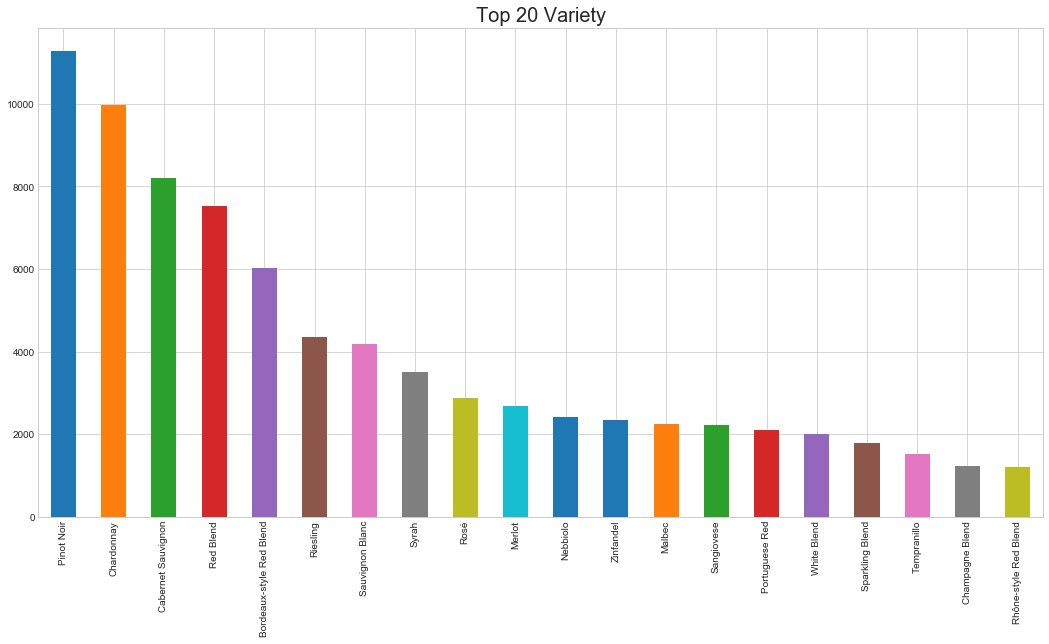

In [67]:
plt.figure(figsize=(18,9))
V=data['variety'].value_counts()
V.head(20).plot.bar()
plt.title("Top 20 Variety", fontsize=20)

#### The top variety is Pinot Noir.

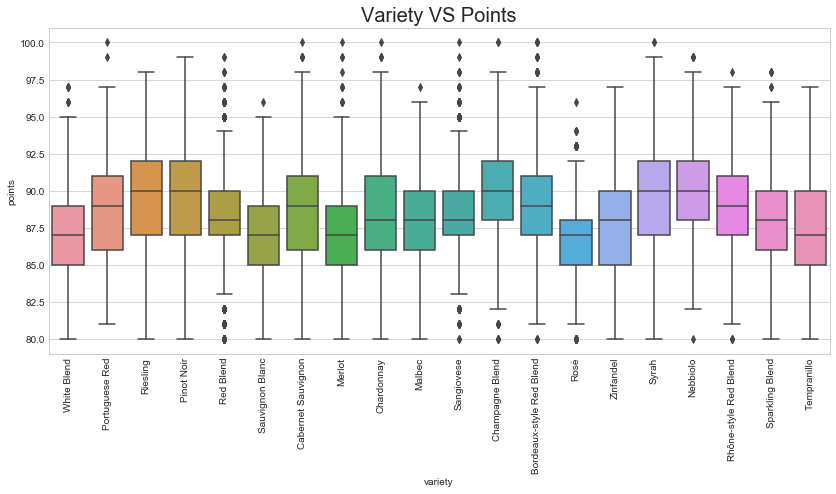

In [68]:
V1= data[data.variety.isin(data.variety.value_counts().head(20).index)]

plt.figure(figsize = (14,6))
plt.title("Variety VS Points", fontsize=20)
sns.boxplot(
    x = 'variety',
    y = 'points',
    data = V1
)
plt.xticks(rotation = 90);

#### The average point of Pinot Noir is 90. The lowest point for this variety is 80, and the highest point is 98.

Text(0,0.5,'Counts')

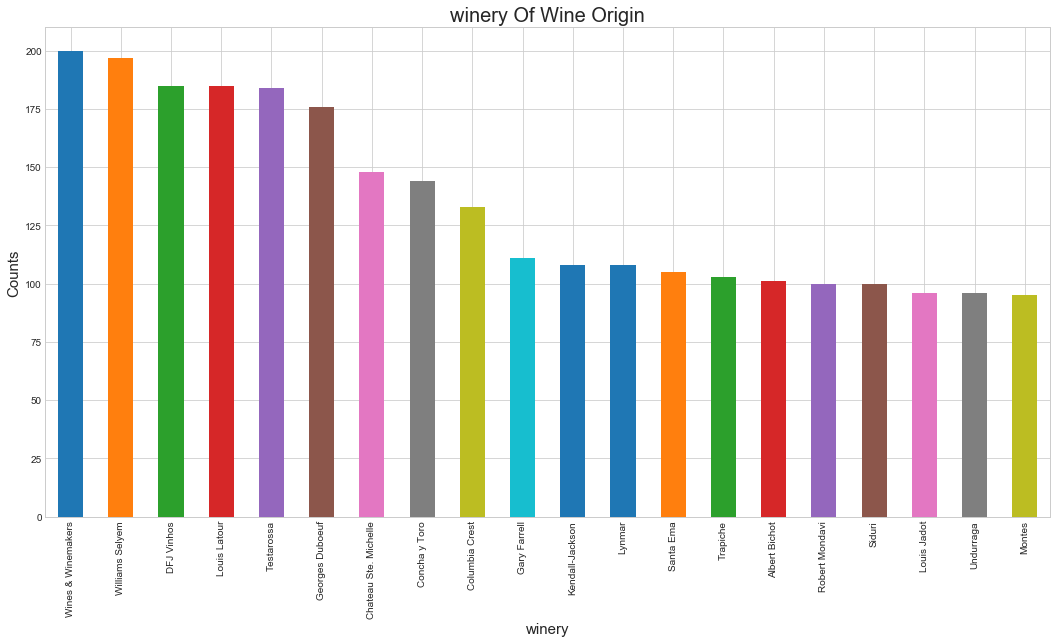

In [69]:
plt.figure(figsize=(18,9))
Winery=data[data['winery']!='unknown']
WineryCnt=Winery['winery'].value_counts()
w = WineryCnt.head(20).plot.bar()
w.set_title("winery Of Wine Origin", fontsize=20)
w.set_xlabel("winery", fontsize=15)
w.set_ylabel("Counts", fontsize=15)

#### The top three winery is wines & winemakers, Willims Selyem, and DFJ Vinhos. All of these three are over 175 showing up. 

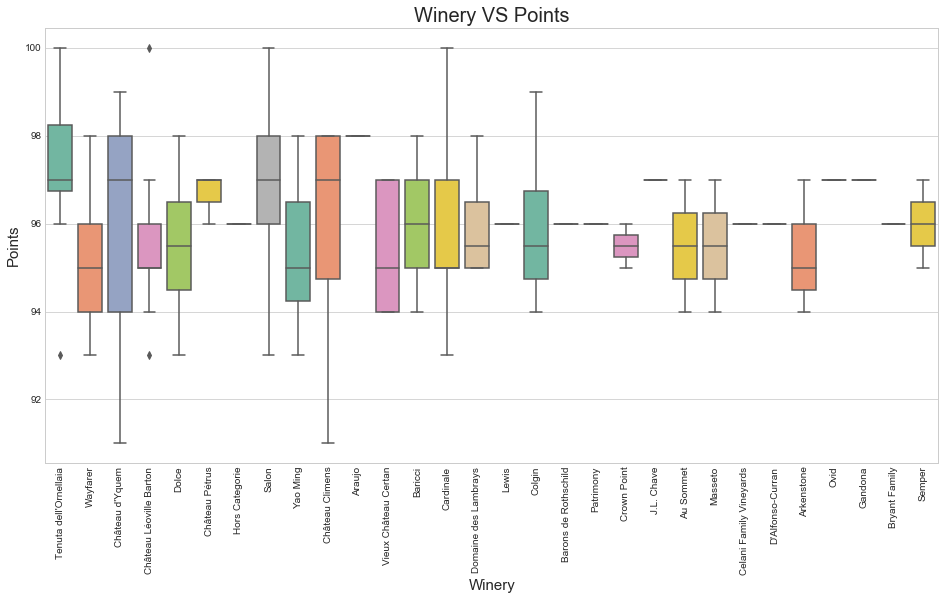

In [77]:
plt.figure(figsize= (16,8))
WincPts = data.groupby(['winery'])['points'].mean().sort_values(ascending=False).to_frame()[:30]
wine = sns.boxplot(y='points', x='winery',
                  data=data[(data.winery.isin(WincPts.index.values))],
                 palette='Set2')
wine.set_title("Winery VS Points", fontsize=20)
wine.set_xlabel("Winery", fontsize=15)
wine.set_ylabel("Points", fontsize=15)
plt.xticks(rotation = 90);

#### The highest average points is 97, and there are four wineries: Tenuta Dell Omellaia, Chateau d'Y quem, Salon and Chateau Climens.

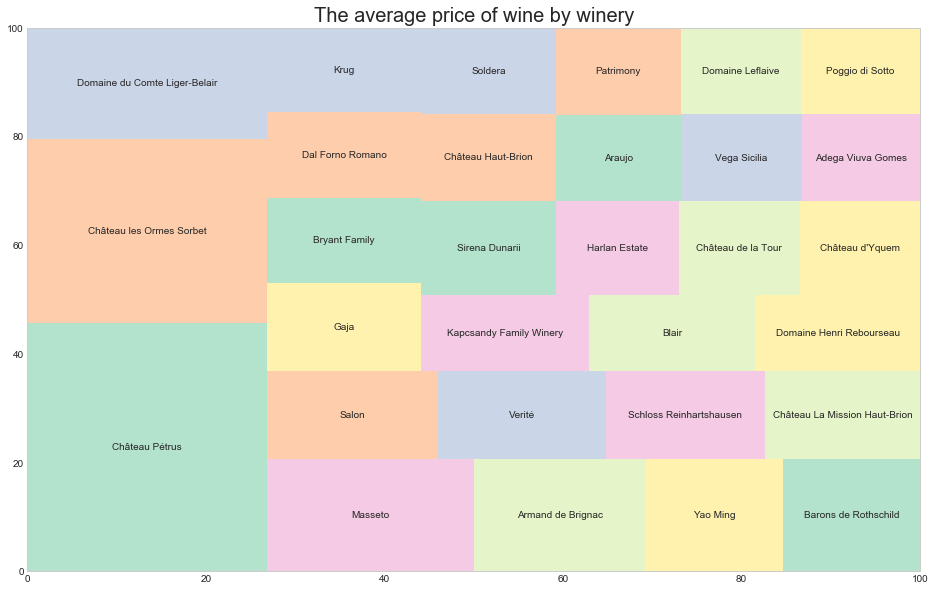

In [76]:
Winec = data.groupby(['winery'])['price'].mean().sort_values(ascending=False).to_frame()[:30]
plt.figure(figsize=(16,10))
squarify.plot(Winec['price'],label=Winec.index,color= sns.color_palette('Pastel2'))
plt.title('The average price of wine by winery',fontsize=20);

#### Based on average price of wine, the top three wineries are Chateau Petrus, Chateau Les Ormes Sorbet and Domaine du Comte Liger-Belair. 